## **Identifying Financial Risk: Z-Score Analysis of Company Data**
---
#### **Group:** Gunjan Sharma & Sneha Ekka

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
data_folder = '/content/drive/MyDrive/BA870-Financial-Analytics/Assignment-1/'

Mounted at /content/drive


### **I. Loading CSV file into a Dataframe**

In [ ]:
data = pd.read_csv(data_folder+'assign1-fix.csv')
data.head()

,gvkey,datadate,tic,conm,act,at,csho,ebit,lct,lt,re,sale,prcc_c,gsector,mve
0,1121,12/31/22,AE,ADAMS RESOURCES & ENERGY INC,250.143,384.159,2.495,6.271,231.060,290.982,72.964,3366.917,38.92,10,97.105
1,1380,12/31/22,HES,HESS CORP,3931.000,21695.000,306.177,3793.000,2396.000,13199.000,1343.000,11324.000,141.82,10,43422.022
2,1661,12/31/22,NBR,NABORS INDUSTRIES LTD,1000.623,4729.854,9.415,29.160,596.390,3514.459,-1852.191,2653.766,154.87,10,1458.101
3,1678,12/31/22,APA,APA CORP,2708.000,13147.000,311.559,4968.000,2916.000,11802.000,-5800.000,10961.000,46.68,10,14543.574
4,1864,1/31/22,REX,REX AMERICAN RESOURCES CORP,345.167,550.361,5.920,69.084,50.483,62.799,642.350,774.802,96.00,10,568.320


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4143 entries, 0 to 4142
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     4143 non-null   int64  
 1   datadate  4143 non-null   object 
 2   tic       4142 non-null   object 
 3   conm      4143 non-null   object 
 4   act       4143 non-null   float64
 5   at        4143 non-null   float64
 6   csho      4143 non-null   float64
 7   ebit      4143 non-null   float64
 8   lct       4143 non-null   float64
 9   lt        4143 non-null   float64
 10  re        4143 non-null   float64
 11  sale      4143 non-null   float64
 12  prcc_c    4143 non-null   float64
 13  gsector   4143 non-null   int64  
 14  mve       4143 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 485.6+ KB


### **II. Cleaning & Preparing Data for Analysis**

In [ ]:
# Changing data types of some columns
data['datadate'] = pd.to_datetime(data['datadate'])
data['tic'] = data['tic'].astype('str')
data['conm'] = data['conm'].astype('str')

> It is helpful to change columns to approriate datatypes so that they can be used in further analysis.



In [ ]:
# Checking for NULL values in the data
data.isna().sum()

gvkey       0
datadate    0
tic         0
conm        0
act         0
at          0
csho        0
ebit        0
lct         0
lt          0
re          0
sale        0
prcc_c      0
gsector     0
mve         0
dtype: int64

> We have no NULL values in the data, and that dataframe seems clean to move ahead with analysis.



In [ ]:
# Getting a sense of the data
data.describe()

,gvkey,act,at,csho,ebit,lct,lt,re,sale,prcc_c,gsector,mve
count,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4.143000e+03
mean,68788.296162,2838.676972,9141.545973,699.473091,815.686837,2260.312535,5787.138424,1860.860470,6547.985255,45.761654,31.090997,1.079716e+04
std,72971.209691,11309.900743,34152.368936,13724.068718,4373.475906,9726.520173,22174.194242,13157.676893,28433.224052,332.397139,12.139725,5.915286e+04
min,1004.000000,0.003000,0.005000,0.013000,-26532.098000,0.003000,0.012000,-102034.000000,0.001000,0.000001,10.000000,6.000000e-03
25%,21430.000000,51.214500,102.867500,27.242500,-22.297000,22.705000,40.720500,-300.668000,40.166000,1.935000,20.000000,7.265650e+01
50%,36383.000000,304.645000,711.363000,65.472000,5.934000,131.433000,330.110000,-31.187000,436.674000,10.060000,30.000000,6.524500e+02
75%,111051.500000,1305.689500,3818.420000,177.037500,265.077500,752.968500,2256.053500,396.774000,2656.783000,39.985000,45.000000,4.030669e+03
max,353945.000000,239728.503000,603595.692000,606407.693000,119437.000000,195571.280000,413010.095000,419590.000000,569962.000000,20000.000000,55.000000,2.071529e+06


In [ ]:
# Calculating Financial Ratios

# A = working capital / total assets
data['A'] = (data['act'] - data['lct']) / data['at']

# B = retained earnings / total assets
data['B'] = data['re'] / data['at']

# C = EBIT (earnings before income & tax) / total assets
data['C'] = data['ebit'] / data['at']

# D = market value of equity / total liabilities
data['D'] = data['mve'] / data['lt']

# E = sales / total assets
data['E'] = data['sale'] / data['at']

# data.head()  -- Helps display the calculated column, but commented out for the purpose of printing a concise hard copy

In [ ]:
# Checking for outliers in the ratios

data[['A','B','C','D','E']].describe()

,A,B,C,D,E
count,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000
mean,-0.240843,-5.194409,-0.283971,7.157489,0.791782
std,9.275482,63.327547,3.280859,56.195514,1.024588
min,-424.285714,-2831.400000,-163.300000,0.000584,0.000119
25%,0.031679,-1.346390,-0.201873,0.761366,0.320567
50%,0.179247,-0.145646,0.022212,1.826824,0.592677
75%,0.415187,0.211838,0.092716,4.405608,1.011351
max,0.990554,6.652454,2.375365,2792.333333,40.857143


> Printing out the statistics for the financial ratios gives us enough detail about the distribution of the values in our datatset. Although, it might be more helpful to visualize these distributions in order to identify outliers more evidently.



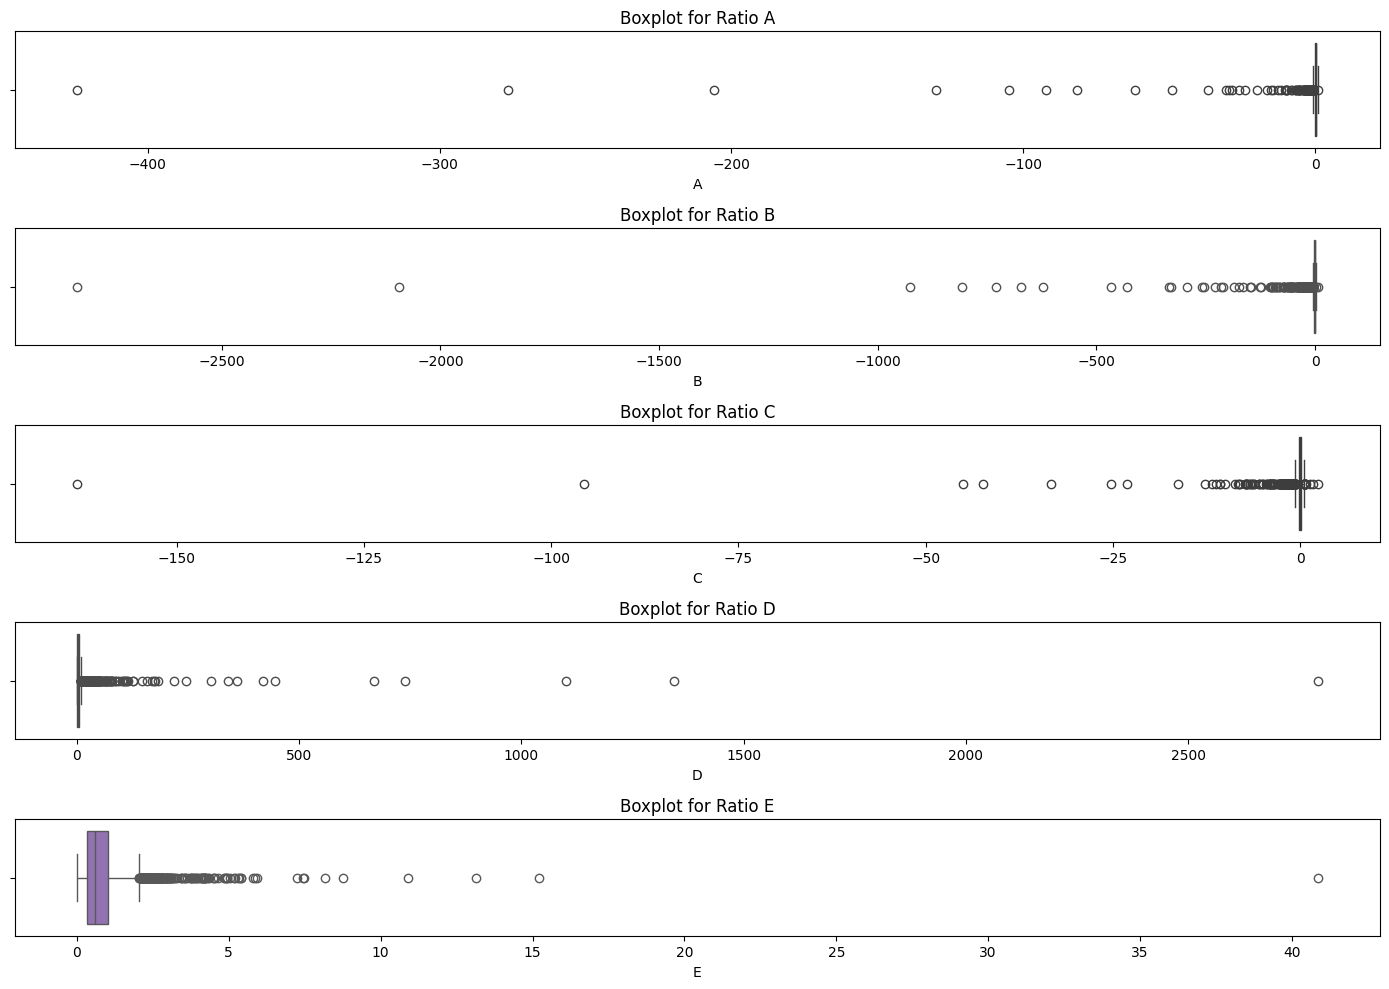

In [ ]:
# Checking for outliers by plotting their distributions

ratios = ['A','B','C','D','E']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.figure(figsize=(14, 10))

for i in range(1,6):
  plt.subplot(5, 1, i)
  sns.boxplot(x = data[ratios[i-1]], color = colors[i-1])
  plt.title('Boxplot for Ratio ' + ratios[i-1])

plt.tight_layout()
plt.show()

> The above visualizations of the boxplots for the ratios indicate a large number of outliers. Outliers in financial ratios can stem from various factors such as data entry errors, seasonal variations in business operations, extraordinary events like mergers or legal settlements, differences in accounting methods, disparities in company size or industry norms, and even potential financial manipulation. These outliers can distort the interpretation of financial performance metrics and should be carefully scrutinized to ensure accurate analysis and decision-making.



In [ ]:
# Treating outliers using Winsorization Method

from scipy.stats import mstats

for ratio in ratios:
  wins_col = ratio + '_wins'
  data[wins_col] = mstats.winsorize(data[ratio], limits=[0.01, 0.01])

# data.head()  -- Helps display the calculated column, but commented out for the purpose of printing a concise hard copy

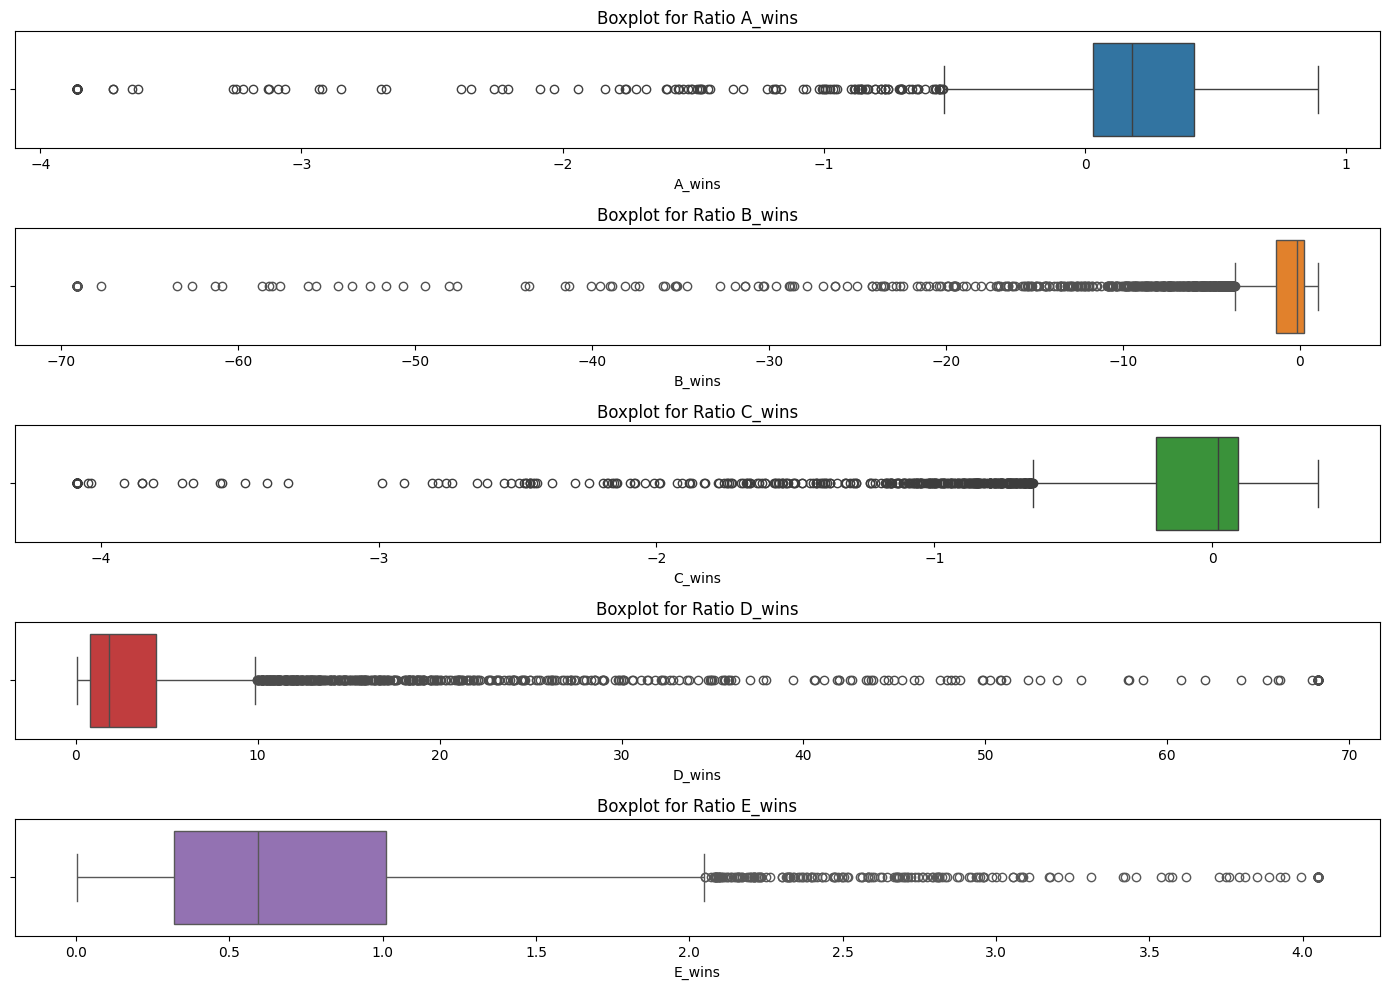

In [ ]:
# Checking for outliers using Boxplot after treating them

ratios_wins = ['A_wins','B_wins','C_wins','D_wins','E_wins']

plt.figure(figsize=(14, 10))

for i in range(1,6):
  plt.subplot(5, 1, i)
  sns.boxplot(x = data[ratios_wins[i-1]], color = colors[i-1])
  plt.title('Boxplot for Ratio ' + ratios_wins[i-1])

plt.tight_layout()
plt.show()

> After winsorization, the data distributions for each ratio are less influenced by extreme outliers. The outliers have been minimized/removed, and the scales of the x-axes have changed, indicating that the extreme values have been reduced. The boxplots appear more compact, and the median and quartiles are more discernible. Even after applying the Winsorization method to treat outliers, some of them may persist due to inherent variability in financial data, unique industry dynamics, or structural differences among companies. While Winsorization can mitigate the influence of outliers to some extent, it may not entirely eradicate them, especially if they are indicative of genuine anomalies or unusual events in the financial data.



### **III. Calculating Z-Score and log(at) for each company**

In [ ]:
# Calculating Z-Score and log(at) from the above ratios and adding them as columns

data['ZScore'] = 1.2 * data['A_wins'] + 1.4 * data['B_wins'] + 3.3 * data['C_wins'] + 0.6 * data['D_wins'] + 1 * data['E_wins']
data['log(at)'] = np.log(data['at'])

# data.head()  -- Helps display the calculated column, but commented out for the purpose of printing a concise hard copy

#### **a. Descriptive statistics for ZScore and log(at)**

In [ ]:
# Checking descriptive statistics for above calculated metrics

descriptive_stats = pd.DataFrame(data[['ZScore', 'log(at)']].describe().loc[['mean','50%','max','min','std']])
descriptive_stats.rename(index={'50%':'median'}, inplace=True)
descriptive_stats

,ZScore,log(at)
mean,-0.045953,6.429269
median,1.864172,6.567183
max,45.183629,13.310660
min,-114.602612,-5.298317
std,15.186289,2.653560


- **Z-score:** The descriptive statistics reveal a distribution skewed towards lower values, as indicated by the negative mean. However, the positive median suggests that many companies have Z-scores above the mean. The presence of extreme outliers is evident from the significantly higher maximum value compared to the mean and median, while the substantially lower minimum value indicates the presence of negative outliers. The relatively high standard deviation underscores the variability in Z-scores across companies.

- **log(at):** the mean and median suggest a positively skewed distribution. Extreme outliers are apparent from the notably higher maximum value compared to the mean and median, while the substantially lower minimum value indicates the presence of negative outliers. Variability in the logarithm of total assets across companies is highlighted by the standard deviation.

#### **b. Percentage of Companies in each Zone - Safe | Grey | Distress**

In [ ]:
# Assigning zones to companies based on their Z-Score
# Adding a column 'zone'

for index, row in data.iterrows():
  if row['ZScore'] > 2.99:
    data.loc[index, 'zone'] = 'safe zone'
  elif (row['ZScore'] > 1.8) & (row['ZScore'] < 2.99):
    data.loc[index, 'zone'] = 'grey zone'
  else:
    data.loc[index, 'zone'] = 'distress zone'

# data.head()  -- Helps display the calculated column, but commented out for the purpose of printing a concise hard copy

In [ ]:
# Getting percentage of companies in each ZONE

total_companies = len(data)

safe_zone_perc = (len(data[data['zone'] == 'safe zone']) / total_companies) * 100
grey_zone_perc = (len(data[data['zone'] == 'grey zone']) / total_companies) * 100
distress_zone_perc = (len(data[data['zone'] == 'distress zone']) / total_companies) * 100

print("% of Safe Zone companies:", np.round(safe_zone_perc,2))
print("% of Grey Zone companies:", np.round(grey_zone_perc,2))
print("% of Distress Zone companies:", np.round(distress_zone_perc,2))

% of Safe Zone companies: 33.57
% of Grey Zone companies: 17.5
% of Distress Zone companies: 48.93


> The distribution of companies across risk categories based on their Z-scores indicates a concerning trend. Nearly half of the companies fall within the "Distress Zone," suggesting a significant proportion face a high risk of financial instability or potential bankruptcy. Additionally, a notable percentage are categorized in the "Grey Zone," indicating a moderate level of risk. Conversely, around a third of the companies are classified in the "Safe Zone," suggesting they exhibit financial stability. These findings underscore the importance of robust financial management and risk assessment practices to mitigate the potential for financial distress and enhance overall stability in the corporate landscape.



#### **c. Descriptive statistics for ZScore and log(at) for each `gsector`**

In [ ]:
# Calculating descriptive statistics for above metrics by 'gsector'

descriptive_stats_by_gsector = data.groupby('gsector').agg({'ZScore': ['mean', 'median', 'max', 'min', 'std'],
                                                            'log(at)': ['mean', 'median', 'max', 'min', 'std']})
descriptive_stats_by_gsector

ZScore                                               log(at)  \
             mean    median        max         min        std      mean   
gsector                                                                   
10       0.759575  1.847123  45.183629 -110.363784  13.482799  7.058034   
15       2.458455  2.368707  43.003756  -93.502663  11.876596  7.162386   
20       1.223293  2.318277  42.714429 -114.602612  11.940525  6.769289   
25       1.525450  2.099950  26.278990 -112.247537   7.758456  6.916454   
30       0.881910  2.392799  40.603666 -110.779045  14.903703  6.651305   
35      -3.636485  0.427291  43.703846 -114.081434  19.834810  5.438454   
45       1.101436  2.523393  43.802141 -113.427245  16.313376  5.967850   
50      -1.796623  1.219822  39.482597 -113.842941  17.884157  6.660467   
55       1.387824  0.983191  18.510216   -6.936291   2.458172  9.007052   

                                                  
           median        max       min       std  
gsector                                           
10       7.357018  13.001379 -4.268698  2.772364  
15       7.567552  11.479824 -0.324346  2.429649  
20       7.096784  12.143069 -4.605170  2.445397  
25       6.934602  13.310660 -2.617296  2.273888  
30       6.994139  12.408442 -2.040221  3.061528  
35       5.386782  12.411887 -3.442019  2.459802  
45       6.115786  12.807214 -3.324236  2.619794  
50       6.814655  12.906327 -5.298317  2.950572  
55       9.255218  12.435906  2.431682  2.258964

**Sector 10 - Energy:**
ZScore statistics indicate relatively healthy financial conditions on average, with a mean close to 0.75 and a median above 1.84. However, the wide range between the maximum and minimum suggests some companies may be experiencing significant distress.
The log(total assets) statistics show a mean of around 7.05, which suggests that companies in this sector may have similar sizes, given the lower standard deviation compared to the ZScore.

**Sector 15 - Materials:**
This sector shows a higher average ZScore (mean around 2.45) and a strong median (around 2.37), indicating overall good financial health. However, the presence of a substantial max ZScore points to outliers with exceptionally strong financials.
The log(total assets) data shows a narrow spread, indicating that companies within this sector are more uniformly distributed in size.

**Sector 20 - Industrials:**
With a mean ZScore above 1 and a median over 2.3, the sector seems financially stable on average. The negative minimum ZScore, however, suggests that there may be some companies in significant distress.
The log(total assets) measures suggest a modest variance in company size with a relatively tight standard deviation.

**Sector 25 - Consumer Discretionary:**
The average and median ZScores are closer to zero, hinting at a balance between financial stability and distress in this sector. The high maximum and low minimum indicate a broad range of financial health.
The log(total assets) statistics show a moderate spread, implying some diversity in company sizes but less so than the diversity in financial health.

**Sector 30 - Consumer Staples:**
This sector presents an average ZScore near 0.88 and a median above 2.39, suggesting a skew towards companies that are financially sound. The broad range in ZScores implies varying degrees of financial health.
The log(total assets) data indicates that while there is some variability in company sizes, it is not as pronounced as the variability in financial health.

**Sector 35 - Health Care:**
The sector is notable for a low mean ZScore (around -3.63), pointing to widespread financial issues. The median, however, is higher, indicating that more than half the companies might still be financially viable.
The mean log(total assets) suggests that companies in this sector are somewhat similar in size, with a smaller standard deviation compared to their ZScore.

**Sector 45 - Information Technology:**
With a mean ZScore above 1 and a median over 2.5, this sector generally indicates financial health. The range in ZScores shows diversity in the financial standing of different companies.
The log(total assets) figures indicate a degree of uniformity in company sizes, with a standard deviation that suggests less variability than in financial health metrics.

**Sector 50 - Communication Services:**
This sector has a negative mean ZScore (around -1.79), which could imply general financial distress, though the median suggests there are companies that fare better. The max and min ZScore reveal a broad disparity in financial health.
The statistics for log(total assets) show a standard deviation that is relatively small, suggesting company sizes do not vary as much as financial health within the sector.

**Sector 55 - Utilities:**
Sector 55 has a relatively high average ZScore (mean approximately 1.39), indicating good financial health overall. However, the significant difference between the max and min ZScore indicates some companies are in distress.
The log(total assets) mean is close to 9, with a moderate standard deviation, indicating some diversity in company sizes but generally indicating larger companies.

#### **d. Comment on range & values of the statistics for full sample v/s each `gsector`**

**Overall Data**

> Overall, the Z-score statistics for the dataset suggest a balanced distribution of financial health, with a mean close to 0 indicating stability. However, the higher median suggests a portion of companies exhibit stronger financial health, possibly with outliers. The wide range and high standard deviation highlight significant variability across companies. Conversely, the natural logarithm of total assets indicates a moderate size range, with a mean around 6.43. While there is some variability in company sizes, it's not as pronounced as the variability observed in financial health metrics.



**Comparison Across Sectors**

> Across sectors, varying financial health and company size distributions emerge. The Energy Sector demonstrates relatively healthy financial conditions, with some companies potentially experiencing distress, while exhibiting similar sizes. The Materials Sector indicates strong financial health with uniform company sizes. Industrials appear financially stable with modest variance in size. Consumer Discretionary shows a balance between stability and distress, with diverse company sizes. Conversely, Consumer Staples presents financially sound companies with moderate size variability. Health Care highlights widespread financial issues but with viable companies, showing somewhat similar sizes. Information Technology generally exhibits financial health with uniform company sizes. Communication Services display financial distress, though some companies fare better, with less size variability. Utilities show good financial health with diverse company sizes, generally larger companies.



**Conclusion**

> Overall, while the overall dataset exhibits a varied distribution of financial health and company sizes, each sector demonstrates unique characteristics. Some sectors, like Materials and Consumer Staples, appear financially robust, while others, like Health Care and Communication Services, exhibit more widespread financial issues. Understanding these differences can inform investment decisions and risk management strategies tailored to specific sectors.



### **IV. 10 Companies with lowest Z-Scores**

In [ ]:
# Getting the 10 companies with the lowest Z-Scores

lowest_zscores = data.sort_values(by='ZScore').head(10)
lowest_zscores[['conm', 'gsector', 'A_wins', 'B_wins', 'C_wins', 'D_wins', 'E_wins', 'ZScore', 'zone']].sort_values(by='gsector')

,conm,gsector,A_wins,B_wins,C_wins,D_wins,E_wins,ZScore,zone
1207,TRUTANKLESS INC,20,-3.859722,-69.107662,-4.085308,0.058822,0.226006,-114.602612,distress zone
1712,ZOOMAWAY TECHNOLOGIES INC,25,-3.859722,-69.107662,-4.085308,0.365190,2.397260,-112.247537,distress zone
1990,MISSFRESH LTD -ADR,30,-3.859722,-69.107662,-4.085308,0.058822,4.049573,-110.779045,distress zone
2975,BIOCORRX INC,35,-3.859722,-69.107662,-4.085308,0.839112,0.279009,-114.081434,distress zone
2920,US STEM CELL INC,35,-3.859722,-69.107662,-4.085308,0.205563,1.205882,-113.534691,distress zone
2812,HONGCHANG INTL CO LTD,35,-3.859722,-69.107662,-4.085308,0.720698,2.468750,-111.962742,distress zone
2164,CELL MEDX CORP,35,-3.859722,-69.107662,-4.085308,5.500488,0.146341,-111.417277,distress zone
3620,CARBONMETA TECHNOLOGIES INC,45,-3.859722,-69.107662,-3.811518,0.225424,0.397906,-113.427245,distress zone
3559,ENABLENCE TECHNOLOGIES INC,45,-3.185495,-69.107662,-4.033473,1.771869,1.379358,-111.441302,distress zone
3938,FARMHOUSE INC,50,-3.859722,-69.107662,-4.085308,1.449091,0.151515,-113.842941,distress zone


> The output reveals the 10 companies with the lowest Z-scores, ranging from -110 to -114, indicating an extremely precarious financial position well below the threshold typically associated with a high risk of bankruptcy. Such low Z-scores suggest these companies are facing severe financial distress and may be at risk of insolvency. This level of financial analysis is crucial for investors and creditors alike, providing valuable insights into the potential for financial failure within a company. Notably, it's interesting to observe that four out of the ten companies with the lowest Z-scores in 2022 belong to the Health Care sector (Sector 35), as indicated by the `gsector` column. This concentration within the Health Care sector underscores the importance of sector-specific financial evaluations and risk assessments. Investors and stakeholders in these companies should exercise caution and conduct thorough due diligence when making investment or lending decisions.



### **V. Linear Regression Model (OLS) - Explain `Z-Score` using `log(sale)`**

In [ ]:
import statsmodels.api as sm

data['log(sale)'] = np.log(data['sale'])

y = data['ZScore']
X = sm.add_constant(data['log(sale)'])

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 ZScore   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     663.9
Date:                Fri, 09 Feb 2024   Prob (F-statistic):          6.56e-136
Time:                        14:55:23   Log-Likelihood:                -16841.
No. Observations:                4143   AIC:                         3.369e+04
Df Residuals:                    4141   BIC:                         3.370e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.1914      0.451    -22.618      0.0

**Results**
> The OLS regression model reveals a significant relationship between a company's Z-score and the natural logarithm of its sales. The positive coefficient of approximately 1.795 for log(sales) suggests that as a company's sales increase, its Z-score tends to rise as well, indicating better financial health for larger companies. However, the model's modest explanatory power, with an R-squared value of about 13.8%, indicates that other factors not included in the model contribute to the variation in Z-scores across companies.

> With over 4,000 observations, the analysis provides a comprehensive view of the relationship between sales and Z-score. The significant F-statistic of 663.9 confirms the overall significance of the regression model. However, it's important to recognize that the majority of the variance in Z-scores remains unexplained, emphasizing the importance of considering additional financial metrics and qualitative factors in assessing a company's financial health and stability.

